In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/expedia-personalized-sort/data.zip
/kaggle/input/expedia-personalized-sort/randomBenchmark.zip
/kaggle/input/expedia-personalized-sort/testOrderBenchmark.zip
/kaggle/input/expedia-personalized-sort/basicPythonBenchmark.zip


In [48]:
import zipfile
!unzip /kaggle/input/expedia-personalized-sort/data.zip

Archive:  /kaggle/input/expedia-personalized-sort/data.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [49]:
ls

__notebook_source__.ipynb  test.csv  train.csv


In [50]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [51]:
X = pd.read_csv("train.csv",nrows=1000000)

In [52]:
X.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 54 columns):
srch_id                        1000000 non-null int64
date_time                      1000000 non-null object
site_id                        1000000 non-null int64
visitor_location_country_id    1000000 non-null int64
visitor_hist_starrating        51576 non-null float64
visitor_hist_adr_usd           51773 non-null float64
prop_country_id                1000000 non-null int64
prop_id                        1000000 non-null int64
prop_starrating                1000000 non-null int64
prop_review_score              998593 non-null float64
prop_brand_bool                1000000 non-null int64
prop_location_score1           1000000 non-null float64
prop_location_score2           781648 non-null float64
prop_log_historical_price      1000000 non-null float64
position                       1000000 non-null int64
price_usd                      1000000 non-null float64
promotion_flag 

In [74]:
x = X.loc[:, ['visitor_location_country_id','prop_country_id','prop_starrating','prop_brand_bool']].values

In [75]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

kmeans5.cluster_centers_

[0 0 0 ... 0 0 0]


array([[218.43418589, 218.08970209,   3.02898344,   0.748805  ],
       [101.09381634, 107.01223616,   3.36266676,   0.49195761],
       [ 57.88482356,  45.92146755,   3.43179399,   0.37048534],
       [215.9870791 ,  71.87800508,   3.55463181,   0.39212991],
       [ 83.88084806, 215.8962073 ,   3.29320141,   0.64181861]])

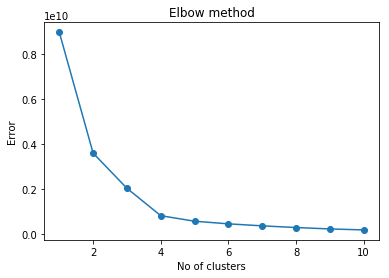

In [76]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error,'-o')
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [77]:
kmeans4 = KMeans(n_clusters=4)
y_kmeans4 = kmeans4.fit_predict(x)
print(y_kmeans4)

kmeans4.cluster_centers_

[0 0 0 ... 0 0 0]


array([[217.87771516, 217.52944294,   3.03383373,   0.74432509],
       [ 79.45314836,  77.25238914,   3.38142058,   0.445847  ],
       [215.15255806,  72.31840196,   3.55664011,   0.39146939],
       [ 84.15709789, 214.68629352,   3.30352379,   0.63552774]])

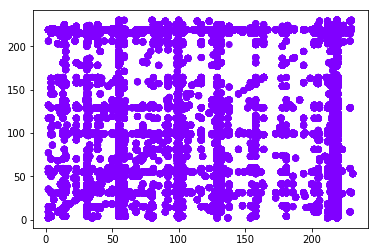

In [78]:
plt.scatter(x[:,0],x[:,1],c=y_kmeans4,cmap='rainbow')